In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential

import seaborn as sns

In [2]:
df=pd.read_csv('Train_Data_2.csv')
df

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult
...,...,...,...,...,...,...,...,...,...
1961,83711.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53,Adult
1962,83712.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02,Adult
1963,83713.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41,Adult
1964,83718.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,Adult


In [3]:
df=df.drop(columns=['SEQN'])
df

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult
...,...,...,...,...,...,...,...,...
1961,2.0,2.0,33.5,100.0,2.0,73.0,6.53,Adult
1962,1.0,2.0,30.0,93.0,2.0,208.0,13.02,Adult
1963,1.0,2.0,23.7,103.0,2.0,124.0,21.41,Adult
1964,2.0,2.0,27.4,90.0,2.0,108.0,4.99,Adult


In [4]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[['RIAGENDR']] = imputer.fit_transform(df[['RIAGENDR']])
df.isnull().sum()

RIAGENDR      0
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64

In [5]:
df['BMXBMI'].fillna(df['BMXBMI'].mean(), inplace=True)
df.isnull().sum()

C:\Users\DAKSH\AppData\Local\Temp\ipykernel_34288\980445591.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMXBMI'].fillna(df['BMXBMI'].mean(), inplace=True)


RIAGENDR      0
PAQ605       13
BMXBMI        0
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64

In [6]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df['age_group'] = ordinal_encoder.fit_transform(df[['age_group']])
imputer = KNNImputer(n_neighbors=5)
df[['age_group']] = imputer.fit_transform(df[['age_group']])
df.isnull().sum()

RIAGENDR      0
PAQ605       13
BMXBMI        0
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group     0
dtype: int64

In [7]:
df['LBXIN'].fillna(df['LBXIN'].mean(), inplace=True)
df['LBXGLT'].fillna(df['LBXGLT'].mean(), inplace=True)
df['LBXGLU'].fillna(df['LBXGLU'].mean(), inplace=True)
df['DIQ010'].fillna(df['DIQ010'].mean(), inplace=True)
df.isnull().sum()

C:\Users\DAKSH\AppData\Local\Temp\ipykernel_34288\1405978833.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LBXIN'].fillna(df['LBXIN'].mean(), inplace=True)
C:\Users\DAKSH\AppData\Local\Temp\ipykernel_34288\1405978833.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

RIAGENDR      0
PAQ605       13
BMXBMI        0
LBXGLU        0
DIQ010        0
LBXGLT        0
LBXIN         0
age_group     0
dtype: int64

In [8]:
imputer = KNNImputer(n_neighbors=5)
df[['PAQ605']] = imputer.fit_transform(df[['PAQ605']])
df.isnull().sum()

RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
age_group    0
dtype: int64

In [9]:
train_df=df
test_df=pd.read_csv('Test_Data_2.csv')

test_df = test_df.drop(columns=['SEQN'])
test_df[['RIAGENDR']] = imputer.fit_transform(test_df[['RIAGENDR']])
test_df['BMXBMI'].fillna(test_df['BMXBMI'].mean(), inplace=True)
test_df['LBXIN'].fillna(test_df['LBXIN'].mean(), inplace=True)
test_df['LBXGLT'].fillna(test_df['LBXGLT'].mean(), inplace=True)
test_df['LBXGLU'].fillna(test_df['LBXGLU'].mean(), inplace=True)
test_df['DIQ010'].fillna(test_df['DIQ010'].mean(), inplace=True)
test_df[['PAQ605']] = imputer.fit_transform(test_df[['PAQ605']])

C:\Users\DAKSH\AppData\Local\Temp\ipykernel_34288\96204063.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['BMXBMI'].fillna(test_df['BMXBMI'].mean(), inplace=True)
C:\Users\DAKSH\AppData\Local\Temp\ipykernel_34288\96204063.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [10]:
df

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,2.0,2.0,35.7,110.000000,2.000000,150.0,14.91,0.0
1,2.0,2.0,20.3,89.000000,2.000000,80.0,3.85,0.0
2,1.0,2.0,23.2,89.000000,2.000000,68.0,6.14,0.0
3,1.0,2.0,28.9,104.000000,2.015914,84.0,16.15,0.0
4,2.0,1.0,35.9,103.000000,2.000000,81.0,10.92,0.0
...,...,...,...,...,...,...,...,...
1961,2.0,2.0,33.5,100.000000,2.000000,73.0,6.53,0.0
1962,1.0,2.0,30.0,93.000000,2.000000,208.0,13.02,0.0
1963,1.0,2.0,23.7,103.000000,2.000000,124.0,21.41,0.0
1964,2.0,2.0,27.4,90.000000,2.000000,108.0,4.99,0.0


In [11]:
def build_model(hp):

    model=Sequential()

    counter = 0

    for i in range(hp.Int('num_layers', 1, 10)):

        if counter == 0:
            model.add(Dense(
                hp.Int('units'+str(i), min_value=8, max_value=128, step=8), 
                activation=hp.Choice('activation'+str(i), ['relu', 'tanh', 'sigmoid']),
                input_dim=7
                )
            )
            model.add(Dropout(hp.Choice('dropout'+str(i), [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
        else:
            model.add(Dense(
                hp.Int('units'+str(i), min_value=8, max_value=128, step=8), 
                activation=hp.Choice('activation'+str(i), ['relu', 'tanh', 'sigmoid'])
                )
            )
            model.add(Dropout(hp.Choice('dropout'+str(i), [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))

        counter += 1

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta']),
                     loss='binary_crossentropy', 
                     metrics=['accuracy'])
    
    return model

In [12]:
import keras_tuner as kt
tuner=kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    directory='my_dir',
    project_name='final')

Reloading Tuner from my_dir\final\tuner0.json


In [13]:
x=df.drop('age_group', axis=1)
y=df['age_group']

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

In [17]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 1,
 'units0': 8,
 'activation0': 'tanh',
 'dropout0': 0.4,
 'optimizer': 'rmsprop',
 'units1': 128,
 'activation1': 'relu',
 'dropout1': 0.9,
 'units2': 80,
 'activation2': 'tanh',
 'dropout2': 0.1,
 'units3': 48,
 'activation3': 'tanh',
 'dropout3': 0.8,
 'units4': 104,
 'activation4': 'sigmoid',
 'dropout4': 0.2,
 'units5': 24,
 'activation5': 'relu',
 'dropout5': 0.3,
 'units6': 8,
 'activation6': 'relu',
 'dropout6': 0.6,
 'units7': 32,
 'activation7': 'relu',
 'dropout7': 0.4,
 'units8': 88,
 'activation8': 'relu',
 'dropout8': 0.9}

In [18]:
model = tuner.get_best_models(num_models=1)[0]

In [19]:
model.fit(x_train, y_train, epochs=200, initial_epoch=6, validation_data=(x_test, y_test))

Epoch 7/200
50/50 [==============================] - 1s 5ms/step - loss: 0.5004 - accuracy: 0.7964 - val_loss: 0.4461 - val_accuracy: 0.8426
Epoch 8/200
50/50 [==============================] - 0s 3ms/step - loss: 0.4928 - accuracy: 0.7945 - val_loss: 0.4261 - val_accuracy: 0.8477
Epoch 9/200
50/50 [==============================] - 0s 3ms/step - loss: 0.4671 - accuracy: 0.8034 - val_loss: 0.4123 - val_accuracy: 0.8503
Epoch 10/200
50/50 [==============================] - 0s 4ms/step - loss: 0.4503 - accuracy: 0.8136 - val_loss: 0.4004 - val_accuracy: 0.8503
Epoch 11/200
50/50 [==============================] - 0s 4ms/step - loss: 0.4482 - accuracy: 0.8085 - val_loss: 0.3920 - val_accuracy: 0.8503
Epoch 12/200
50/50 [==============================] - 0s 3ms/step - loss: 0.4333 - accuracy: 0.8238 - val_loss: 0.3873 - val_accuracy: 0.8528
Epoch 13/200
50/50 [==============================] - 0s 3ms/step - loss: 0.4363 - accuracy: 0.8200 - val_loss: 0.3839 - val_accuracy: 0.8528
Epoch 14/

In [20]:
test_df

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,1.0,1.0,24.7,91.0,2.0,105.0,3.12
...,...,...,...,...,...,...,...
307,2.0,2.0,21.9,82.0,2.0,82.0,2.54
308,2.0,1.0,33.3,95.0,2.0,77.0,6.36
309,2.0,2.0,41.5,91.0,2.0,149.0,15.52
310,2.0,2.0,22.5,82.0,2.0,93.0,1.39


In [21]:
test_x = test_df
test_x = scaler.transform(test_x)
predictions = model.predict(test_x)

10/10 [==============================] - 0s 1ms/step


In [22]:
predictions

array([[0.06268957],
       [0.18849273],
       [0.33997035],
       [0.04919891],
       [0.0664616 ],
       [0.21195932],
       [0.23991555],
       [0.35867208],
       [0.05000138],
       [0.11594177],
       [0.26818076],
       [0.26319838],
       [0.06639483],
       [0.25021222],
       [0.4712879 ],
       [0.11528715],
       [0.38807058],
       [0.2583438 ],
       [0.07363681],
       [0.09312213],
       [0.45529163],
       [0.0608523 ],
       [0.17424314],
       [0.12356527],
       [0.06243189],
       [0.13243641],
       [0.03639898],
       [0.12069231],
       [0.21840346],
       [0.06280608],
       [0.05015732],
       [0.2529818 ],
       [0.1662897 ],
       [0.4796309 ],
       [0.21317096],
       [0.05443613],
       [0.0420496 ],
       [0.27853134],
       [0.05770534],
       [0.08467328],
       [0.08934253],
       [0.06213131],
       [0.18902797],
       [0.07719868],
       [0.08593103],
       [0.1053642 ],
       [0.08545961],
       [0.273

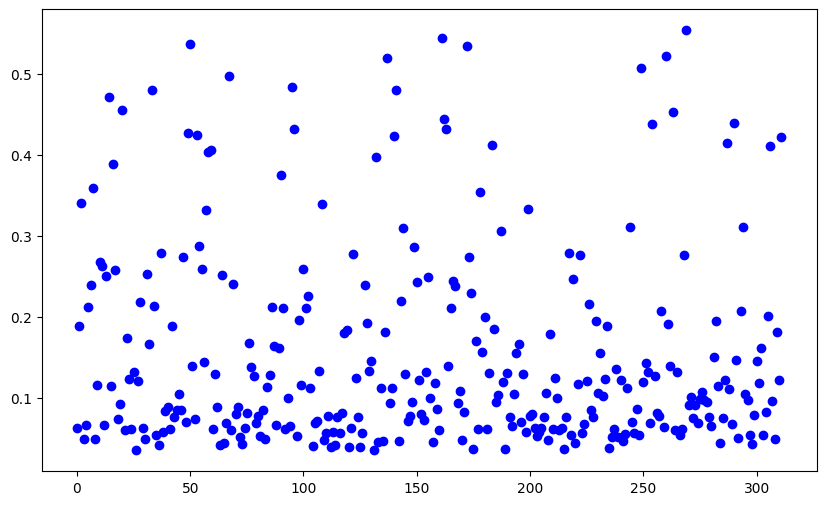

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(predictions)), predictions, color='blue', label='Predictions')

In [24]:
# if prediction is > 0.2 then it is 1 else 0
predictions = [1 if pred > 0.2 else 0 for pred in predictions]

# now put it in the csv file
submission_df = pd.DataFrame({
    'age_group': predictions
})
submission_df.to_csv('submission_by_dnn_06.csv', index=False)